In [187]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

df = pd.read_csv('Mall_Customers 1.csv')
df1 = df.drop(columns='CustomerID')

df1['Gender'] = df1['Gender'].map({'Male': 0, "Female": 1})

df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [188]:
df1.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [189]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [190]:
df1.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [191]:
Treino, Teste = train_test_split(df1, test_size=0.2, random_state=42)

In [192]:
Treino.shape

(160, 4)

In [193]:
Teste.shape

(40, 4)

In [194]:
means = KMeans(n_clusters=2,random_state=42)
means.fit(Treino)

KMeans(n_clusters=2, random_state=42)

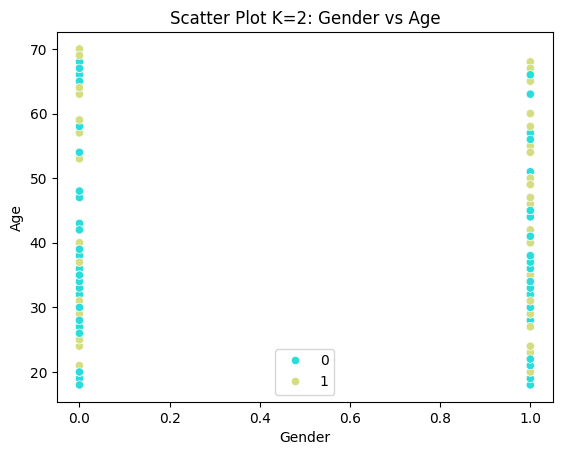

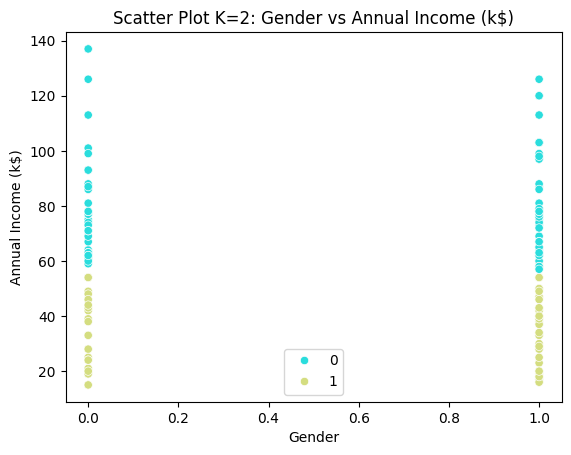

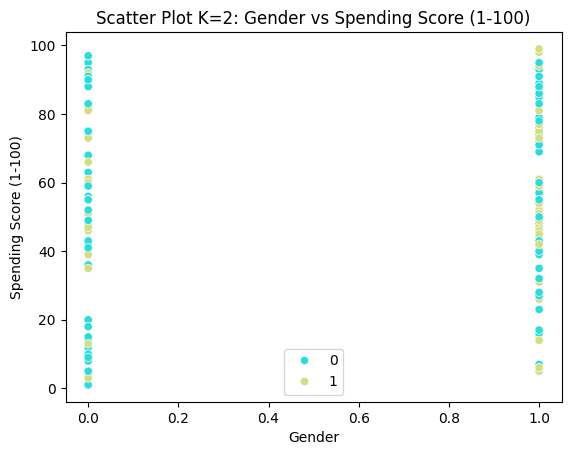

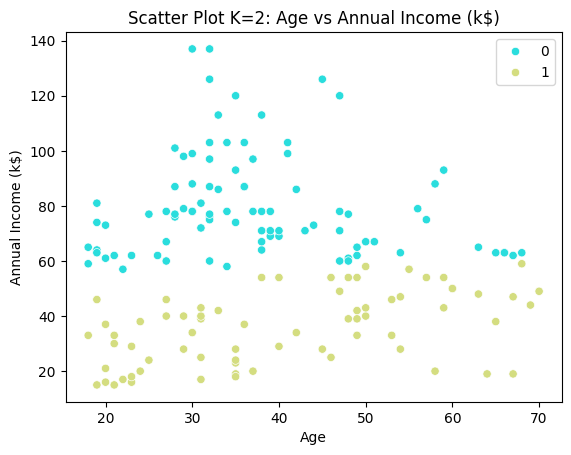

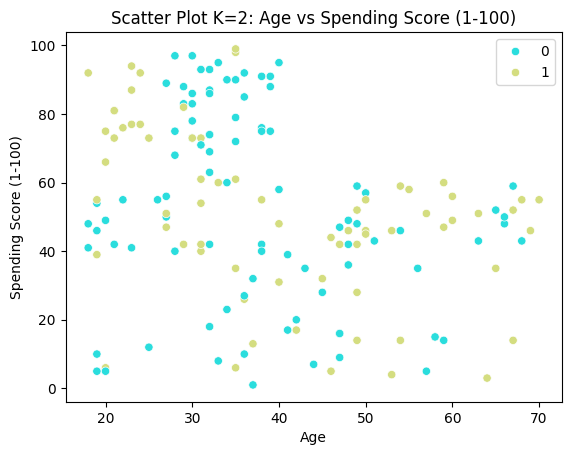

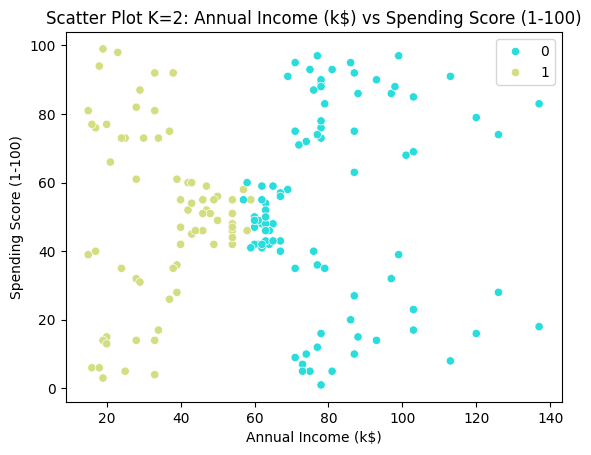

In [195]:
import matplotlib.pyplot as plt

features = Treino.columns

for i in range(len(features)):
  for j in range(i + 1, len(features)):
    plt.figure()
    sns.scatterplot(x=Treino[features[i]], y=Treino[features[j]], hue=means.labels_, palette='rainbow')
    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.title(f'Scatter Plot K=2: {features[i]} vs {features[j]}')
    plt.show()


In [196]:
(means.score(Treino)*-1)**0.5

428.2908780145524

n_clusters = 2, Métrica = 428.29
n_clusters = 3, Métrica = 359.31
n_clusters = 4, Métrica = 294.93
n_clusters = 5, Métrica = 248.15
n_clusters = 6, Métrica = 221.96
n_clusters = 7, Métrica = 214.39
n_clusters = 8, Métrica = 190.58
n_clusters = 9, Métrica = 183.46
n_clusters = 10, Métrica = 177.28
n_clusters = 11, Métrica = 168.37
n_clusters = 12, Métrica = 163.39
n_clusters = 13, Métrica = 159.74
n_clusters = 14, Métrica = 152.99
n_clusters = 15, Métrica = 146.95
n_clusters = 16, Métrica = 142.93


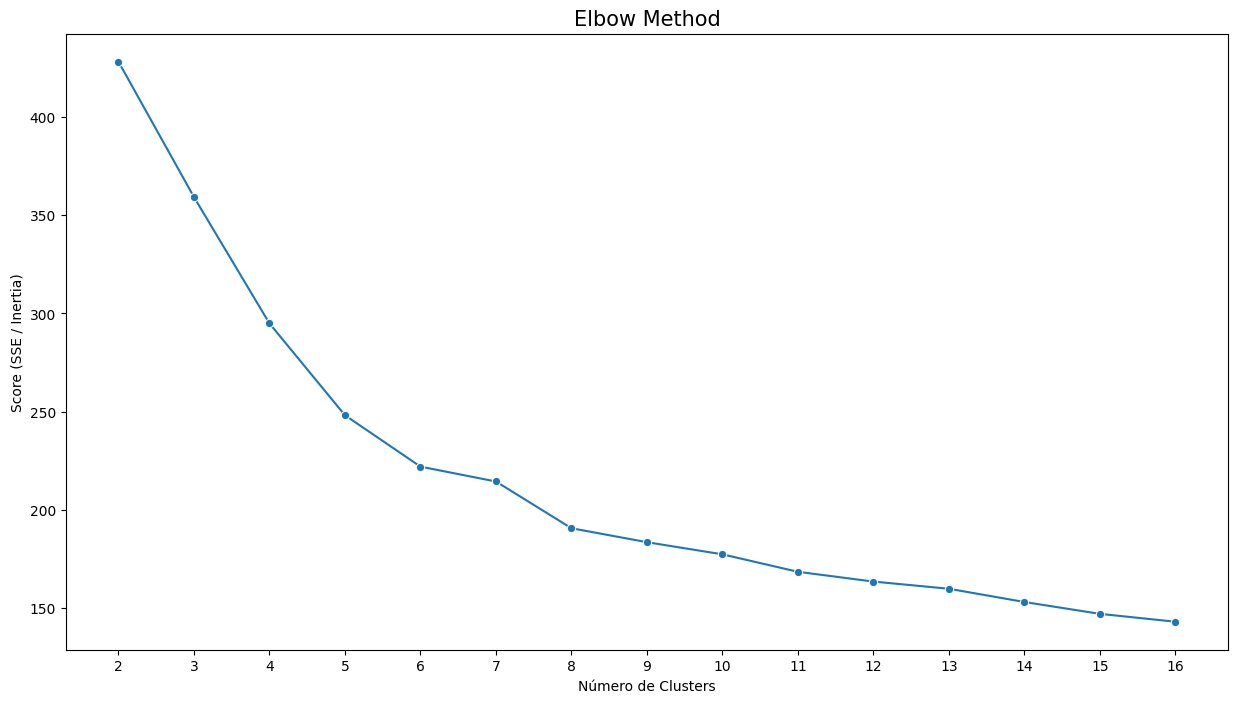

In [197]:
# Lista de valores para n_clusters que você deseja testar
n_clusters_list = list(range(2,17))

# Dicionário para armazenar os resultados
results = {}

# Loop para calcular a métrica para cada valor de n_clusters
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(Treino)
    
    # Calcular a métrica baseada no score
    score = (kmeans.score(Treino) * -1) ** 0.5
    
    # Armazenar o resultado
    results[n_clusters] = score

# Exibir os resultados
for n_clusters, score in results.items():
    print(f'n_clusters = {n_clusters}, Métrica = {round(score, 2)}')

# Plotar o gráfico
plt.figure(figsize=(15,8))
sns.lineplot(x=list(results.keys()), y=list(results.values()), marker='o')
plt.xticks(range(2,17))
plt.xlabel('Número de Clusters')
plt.ylabel('Score (SSE / Inertia)')
plt.title('Elbow Method', fontsize=15)
plt.show()

In [198]:
newmeans = KMeans(n_clusters=5)
newmeans.fit(Treino)

KMeans(n_clusters=5)

In [199]:
(newmeans.score(Treino)*-1)**0.5

248.2000680837768

In [200]:
prevs = newmeans.predict(Teste)
prevs

array([1, 3, 4, 0, 0, 1, 1, 0, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 4,
       0, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 1, 0, 1, 2, 2, 0, 1])

In [201]:
(newmeans.score(Teste)*-1)**0.5

122.07649834700796

***ANÁLISE E CONCLUSÃO***

Primeiramente fizemos uma análise descritiva do dados verificando se havia algum dado faltante e fizemos dois tratamentos para iniciar a clusterização:

    1- Retiramos a columa CustomerID por ela não representar uma feature que poderia indicar qual o nível de gasto do visitante;

    2- Fizemos um tratamento MAP na coluna Gênero para Masculino e Feminino igual a 0 e 1, respectivamente.

Depois disso, separamos a base em 80% treino e 20% teste e iniciamos a clusterização ulilizando k=2 como chute inicial.

Observamos pelos gráficos que talvez 2 clusters apenas seria muito pouco e decidimos variar o k para obter um número mais factível.

Utilizamos o Elbow Method para identificar qual o melhor k e para isso o que foi analisado é que a partir de k=5 a curva começa a estagnar não tendo grandes ganhos no aumento da clusterização.

Vemos que o Score do Teste foi melhorado em relação ao Treino, mostrando um bom fit.

In [210]:
# Para realizar a análise, é necessário ajustar o modelo de KMeans com 5 clusters e calcular as médias por cluster
from sklearn.cluster import KMeans

# Remover a coluna CustomerID e mapear o Gender para valores numéricos
df_cleaned = df.drop(columns='CustomerID')
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# Ajustar o modelo de KMeans com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned)

# Calcular as médias por cluster
cluster_means = df_cleaned.groupby('Cluster').mean()

print(cluster_means)

print(pd.DataFrame(df_cleaned.drop(columns='Cluster').mean()).T)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.617978  46.213483           47.719101               41.797753
1        0.545455  32.454545          108.181818               82.727273
2        0.517241  24.689655           29.586207               73.655172
3        0.473684  40.394737           87.000000               18.631579
4        0.545455  31.787879           76.090909               77.757576
   Gender    Age  Annual Income (k$)  Spending Score (1-100)
0    0.56  38.85               60.56                    50.2
